 #  <font color='Green'>Feature Selection and EDA</font> 
 # <font color='Green'>--------------------------------------</font> 
 

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
Data = pd.read_csv('/content/drive/MyDrive/FINAL_DATA_updated.csv')
Data = Data.set_index('Date')
Data = Data.drop(columns=['Y_change','Y_high','Y_low'])
print(len(Data))

2888


<font size=3><b>The data set consists of 2888 data points. <br> Each data point corresponds to Each day's data(Data is collected from 2009 feb to 2020 dec)</b>

In [1]:
# del Data['Unnamed: 0']
# del Data['Open_T']

In [8]:
X_Train = Data.iloc[0:2311]
Y_Train = Data['Y_trend'].iloc[0:2311]
del X_Train['Y_trend']

X_Test  =  Data.iloc[2311:]
Y_Test  =  Data['Y_trend'].iloc[2311:]
del X_Test['Y_trend']

print("Training Data Shape: ",X_Train.shape)
print("\nTest Data Shape: ",X_Test.shape)

Training Data Shape:  (2311, 516)

Test Data Shape:  (577, 516)


<font size=3><b>Since we are dealing with time based data, temporal train_test split is done (80% train and 20% test)</b><br><br>
<b> There are 774 features (Each data point consists of current day's features and also features of the previous 5 days).<br>
<b> i.e T_day_data_point has T_day_features,T1_day,T2_day,T3_day,T4_day and T5_day features.<br>
<b> T1_day = previous day,T2_day = previous to previous day and similarly the rest.
    
<br>All the features are numerical.<br>

In [9]:
print("Classes Distribution in Training Data")
print("."*40)
dists = Y_Train.value_counts()
class_1_percentage = (dists[1]/2311)*100
class_0_percentage = (dists[0]/2311)*100
print("\nClass-1 (Days with Bullish Trend) : {0} %".format(round(class_1_percentage,2)) )
print("\nClass-0 (Days with Bearish Trend) : {0} %".format(round(class_0_percentage,2)) )

Classes Distribution in Training Data
........................................

Class-1 (Days with Bullish Trend) : 49.98 %

Class-0 (Days with Bearish Trend) : 50.02 %


In [10]:
print("Classes Distribution in Test Data")
print("."*40)
dists = Y_Test.value_counts()
class_1_percentage = (dists[1]/577)*100
class_0_percentage = (dists[0]/577)*100
print("\nClass-1 (Days with Bullish Trend) : {0} %".format(round(class_1_percentage,2)) )
print("\nClass-0 (Days with Bearish Trend) : {0} %".format(round(class_0_percentage,2)) )

Classes Distribution in Test Data
........................................

Class-1 (Days with Bullish Trend) : 50.09 %

Class-0 (Days with Bearish Trend) : 49.91 %


<font size=3><b>It's clearly evident that even after temporal train_test splitting, data is perfectly balanced in both train and test data sets
<br>So There is no data imbalance problem.<br>

Since almost 50% of data are of class-1 and remaining 50% of data are of class-0, without using any machine learning techniques
we can predict the class with 50% accuracy.

So ML model with 50% accuracy is considered very poor<br>
ML model with 65 to 75% accuracy is considered as moderate model<br>
ML model with 85% accuracy is considered as good model.</b>


 #### <font size= 4, color='red'>Checking for Missing Values</font> 

In [ ]:
X_Train.isnull().values.any()

In [ ]:
X_Test.isnull().values.any()

<font size=3><b>There are no missing values in the data 

#### <font size= 4, color='red'>Removing features with zero variance</font> 

In [11]:
Features = X_Train.columns

from sklearn.feature_selection import VarianceThreshold
Zero_Variance_thresholder = VarianceThreshold()
Zero_Variance_thresholder.fit(X_Train)

Duplicate_Columns = [column for column in Features 
                    if column not in Features[ Zero_Variance_thresholder.get_support() ] ]
Duplicate_Columns

['CDLSTICKSANDWICH_T1',
 'CDLTRISTAR_T1',
 'CDLSTICKSANDWICH_T2',
 'CDLTRISTAR_T2',
 'CDLSTICKSANDWICH_T3',
 'CDLTRISTAR_T3',
 'CDLSTICKSANDWICH_T4',
 'CDLTRISTAR_T4',
 'CDLSTICKSANDWICH_T5',
 'CDLTRISTAR_T5']

In [12]:
X_Train = X_Train.drop(columns=Duplicate_Columns)
X_Test  = X_Test.drop(columns =Duplicate_Columns) 
Features = X_Train.columns

#### <font size= 4, color='red'>Normalizing the data</font> 

In [13]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

X_Train_scaled = X_Train.copy()
X_Test_scaled  = X_Test.copy()

for col in Features:
  # fit scaler on training data
  normalizer = MinMaxScaler().fit(X_Train[[col]])

  # transform training data
  X_Train_scaled[col] = normalizer.transform(X_Train[[col]])

  # transform testing dataabs
  X_Test_scaled[col] = normalizer.transform(X_Test[[col]])

In [14]:
X_Train_scaled.shape

(2311, 506)

## <font size= 5 color='red'>Feature Selection </font> 
 # <font color='red'>--------------------------</font> 

<font size=3><b>Since all the features are formed on basis of domain knowledge and extensive research,<br>
Its better to perform feature selection to check whether features are actually working or not<br>
Also current dimensionality is very high (i.e 764 features),So Feature selection helps to identify the best possible features<br>

### <font size= 4 color='red'>Featue Selection based on Annova F-Value method</font> 


<font size=3><b>All the Features are ranked based on the F-value(Higher F-value, Better is the rank of the feature)<b>

In [ ]:
#Refernce : https://stackoverflow.com/questions/55098122/ranking-all-features-in-order-using-scikit-learn

import numpy as np
from sklearn.feature_selection import f_classif

F_scores, _ = f_classif(X_Train_scaled.values,Y_Train.values)
Feature_indices_annova = np.argsort(F_scores)[::-1]
k_best_features_Anova  = list(Features[Feature_indices_annova])

annova_rankings = [0]*506
feature_rank = 1
for feature_index in Feature_indices_annova:
  annova_rankings[feature_index] = feature_rank
  feature_rank = feature_rank+1

In [ ]:
print("The Top-10 Features From ANOVA")
print('.'*30)
k_best_features_Anova[0:10]

The Top-10 Features From ANOVA
..............................


['RSI-14_T',
 'change_in_crude_price_T1',
 'MFI-14_T',
 'Fran_day_trend_T1',
 'Lon_day_trend_T1',
 'US_day_trend_T2',
 'US_day_trend_T1',
 'Fran_day_trend_T2',
 'RSI-14_T3',
 'gap_up_down_opening_T1']

In [ ]:
print("The Least Important Features From ANOVA")
print('.'*30)
k_best_features_Anova[-10:]

The Least Important Features From ANOVA
..............................


['CDLINNECK_T2',
 'CDLTASUKIGAP_T4',
 'CDLTASUKIGAP_T1',
 'CDLHIGHWAVE_T3',
 'Lon_day_trend_T3',
 'CDLCOUNTERATTACK_T3',
 'CDLCOUNTERATTACK_T1',
 'CDLCOUNTERATTACK_T5',
 'CDLBREAKAWAY_T4',
 'CDLBREAKAWAY_T2']

In [ ]:
# rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df = pd.DataFrame()
rankings_df['Rankings_Annova'] = list((annova_rankings))
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm

vif_data = pd.DataFrame()
vif_data["Features"] = X_Train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_Train_scaled.values, i) for i in tqdm(range(X_Train_scaled.shape[1]))]
vif_data.to_csv('/content/drive/MyDrive/VIF_for_each_feature.csv')

100%|██████████| 506/506 [04:24<00:00,  1.91it/s]


In [ ]:
len(vif_data[vif_data["VIF"] >= 10000000 ])

67

### <font size = 4 color='red'>Featue Selection based on Recursive Feature Elimination Method</font> 

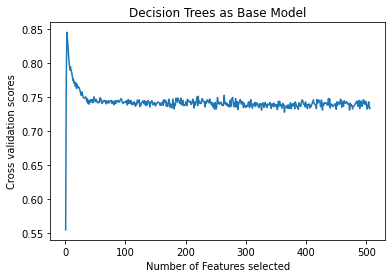

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=36,max_depth=10)

rfecv_dec_tree = RFECV(estimator=base_estimator, 
                        step=1,
                        cv=StratifiedKFold(10),
                        scoring='accuracy',
                        n_jobs= -1
                        )
rfecv_dec_tree.fit(X_Train_scaled, Y_Train)

plt.figure()
plt.title('Decision Trees as Base Model')
plt.xlabel("Number of Features selected")
plt.ylabel("Cross validation scores")
plt.plot( range(1,len(rfecv_dec_tree.grid_scores_) + 1),  
          rfecv_dec_tree.grid_scores_
         )
plt.show()

In [ ]:
kbest_features_with_RFE_Decision_Tree = rfecv_dec_tree.get_support()

print("\nFrom RFE with Decision Tree as Base model, \
       \n{0} features are enough for giving the best validation accuracy of arround {1}%".format(rfecv_dec_tree.n_features_,round(max(list(rfecv_dec_tree.grid_scores_))*100,2)))
print("."*60)
list(Features[kbest_features_with_RFE_Decision_Tree])


From RFE with Decision Tree as Base model,        
3 features are enough for giving the best validation accuracy of arround 84.51%
............................................................


['gap_up_down_opening_T', 'RSI-14_T', 'RSI-14_T1']

In [ ]:
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df['Rankings_Decision_Tree'] = list((rfecv_dec_tree.ranking_))
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

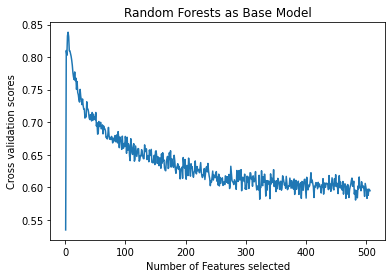

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

base_estimator = RandomForestClassifier(random_state=36,max_depth=10)

rfecv_rf = RFECV(estimator=base_estimator, 
                     step=1,
                     cv=StratifiedKFold(10),
                     scoring='accuracy',
                     n_jobs= -1
                        )
rfecv_rf.fit(X_Train_scaled, Y_Train)

plt.figure()
plt.title('Random Forests as Base Model')
plt.xlabel("Number of Features selected")
plt.ylabel("Cross validation scores")
plt.plot( range(1,len(rfecv_rf.grid_scores_) + 1),  
          rfecv_rf.grid_scores_
         )
plt.show()

In [ ]:
kbest_features_with_RFE_Random_Forest = rfecv_rf.get_support()

print("\nFrom RFE with Random Forests as Base model, \
       \n{0} features are enough for giving the best validation accuracy of {1}%".format(rfecv_rf.n_features_,(max(list(rfecv_rf.grid_scores_))*100)))
print("."*60)
list(Features[kbest_features_with_RFE_Random_Forest])


From RFE with Random Forests as Base model,        
5 features are enough for giving the best validation accuracy of 83.81624123003432%
............................................................


['Pivot_T', 'RSI-14_T', 'EMA_21_T1', 'EMA_sm_cross_T1', 'RSI-14_T1']

In [ ]:
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df['Rankings_Random_Forest'] = list((rfecv_rf.ranking_))
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

In [ ]:
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df['Features'] = pd.Series(Features)
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

base_estimator = ExtraTreesClassifier(n_estimators=136,n_jobs=-1,max_depth=10)

rfecv_et = RFECV(estimator=base_estimator, 
                     step=1,
                     cv=StratifiedKFold(10),
                     scoring='accuracy',
                     n_jobs= -1
                        )
rfecv_et.fit(X_Train_scaled, Y_Train)

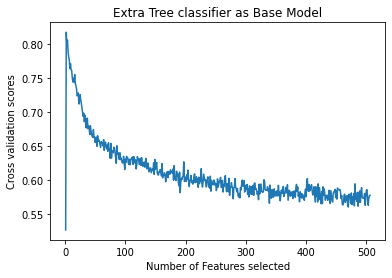

In [ ]:
plt.figure()
plt.title('Extra Tree classifier as Base Model')
plt.xlabel("Number of Features selected")
plt.ylabel("Cross validation scores")
plt.plot( range(1,len(rfecv_et.grid_scores_) + 1),  
          rfecv_et.grid_scores_
         )
plt.show()

In [ ]:
kbest_features_with_RFE_ET = rfecv_et.get_support()

print("\nFrom RFE with Extra Trees as Base model, \
       \n{0} features are enough for giving the best validation accuracy of {1}%".format(rfecv_et.n_features_,(max(list(rfecv_et.grid_scores_))*100)))
print("."*60)
list(Features[kbest_features_with_RFE_ET])


From RFE with Extra Trees as Base model,        
2 features are enough for giving the best validation accuracy of 81.78328855052992%
............................................................


['RSI-14_T', 'RSI-14_T1']

<br>
<font size = 3><b>After applying RFE technique with different base models,<br>
 It's clearly evident from all the above plots that , With < 100 features the accuracy is arround 80-85%. 
 <br>And as the number of features increases,the accuracy is getting worse <b>
   <br><br> 
<b>Another important point is that Using RFE technique with various base models,<br>
 Features like RSI-14_T, RSI-14_T1, gap_up_down_opening are very important and are also common in all base models.
    
 <br>

In [ ]:
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df['Rankings_Extra_Tree'] = list((rfecv_et.ranking_))
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
Feature_rankings_extra_tree = [0]*len(Features)
cross_validation_accuracy = 0

for i in (range(10)):
  Extra_Tree_clf  = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,max_depth=5)
  Extra_Tree_clf.fit(X_Train_scaled,Y_Train)
  cross_val_score_mean = (cross_val_score(Extra_Tree_clf, X_Train_scaled,Y_Train, scoring='accuracy',n_jobs=-1)).mean()
  cross_validation_accuracy += cross_val_score_mean
  
cross_validation_accuracy = (cross_validation_accuracy/10)

print("\nFrom ExtraTreeClassifier with a validation accuracy of {0} %, \nThe Top-10 important features are ".format(round(cross_validation_accuracy,2)*100))
print("."*55)
list(rankings_df['Features'].iloc [ list((np.argsort(np.array(Feature_rankings_extra_tree)))[0:10]) ])


From ExtraTreeClassifier with a validation accuracy of 56.00000000000001 %, 
The Top-10 important features are 
.......................................................


['RSI-14_T',
 'MFI-14_T',
 'CDLTAKURI_T3',
 'CDLHOMINGPIGEON_T1',
 'US_day_trend_T2',
 'Fran_day_trend_T1',
 'RSI-14_T3',
 'Lon_day_trend_T1',
 'CDLEVENINGDOJISTAR_T1',
 'CDLLONGLINE_T4']

<font size=3><b>From this also it's again evident that all features given directly is resulting in bad accuracy.
<br> And RSI-14 is again in the important feature list

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tqdm import tqdm

vif_data = pd.DataFrame()
vif_data["Features"] = X_Train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_Train_scaled.values, i) for i in tqdm(range(X_Train_scaled.shape[1]))]
vif_data.to_csv('/content/drive/MyDrive/VIF_for_each_feature.csv')

100%|██████████| 506/506 [04:24<00:00,  1.91it/s]


### <font size=4 color='red'>Featue Selection based on Feature Forward selection Method</font> 

#### <font size=3 color='red'>Feature Forward selection with logistic regression as base model</font> 

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import SGDClassifier
base_estimator = SGDClassifier(loss='log',
                               max_iter=3000,
                               random_state=36)

sfs = SFS(estimator=base_estimator,
          k_features=(50, 150), 
          forward=True,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sfs.fit(X_Train_scaled, Y_Train)
best_feature_indices = list(sfs.k_feature_idx_)

Rankings_Forward_selection = [155]*len(Features)
for i in best_feature_indices:
    Rankings_Forward_selection[i] = 1  


rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df['Forward_Feature_Selector_rankings_log_reg'] = Rankings_Forward_selection
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("\nFrom feature Forward selection technique using logistic regression as Base Model")
print("The Best Cross validation accuracy obtained is {0} % with {1} features".format( (round(sfs.k_score_,2)*100),len(best_feature_indices) ) )
print("*"*80)

Features[best_feature_indices]


From feature Forward selection technique using logistic regression as Base Model
The Best Cross validation accuracy obtained is 91.0 % with 64 features
********************************************************************************


Index(['gap_up_down_opening_T', 'Pivot_T', 'RSI-14_T',
       'japan_today_init_trend_strength_up_shadow_T',
       'japan_today_init_trend_strength_low_shadow_T', 'Day_trend_T1',
       'Day_trend_strength_up_shadow_T1', 'Change_in_Volume_T1', 'RSI-14_T1',
       'CDLGAPSIDESIDEWHITE_T1', 'CDLGRAVESTONEDOJI_T1', 'CDLHIKKAKEMOD_T1',
       'CDLHOMINGPIGEON_T1', 'CDLINVERTEDHAMMER_T1', 'CDLLADDERBOTTOM_T1',
       'CDLMORNINGDOJISTAR_T1', 'CDLMORNINGSTAR_T1', 'CDLUNIQUE3RIVER_T1',
       'US_trend_strength_up_shadow_T1', 'US_trend_strength_low_shadow_T1',
       'Lon_trend_strength_up_shadow_T1', 'Lon_trend_strength_low_shadow_T1',
       'Fran_trend_strength_up_shadow_T1', 'Fran_trend_strength_low_shadow_T1',
       'Singp_trend_strength_up_shadow_T1',
       'Singp_trend_strength_low_shadow_T1',
       'China_trend_strength_low_shadow_T1',
       'Honkon_trend_strength_up_shadow_T1',
       'Honkon_trend_strength_low_shadow_T1',
       'Japan_trend_strength_low_shadow_T1', 'Day_trend_

In [ ]:
print(best_feature_indices)

[0, 1, 3, 18, 19, 20, 21, 25, 48, 69, 70, 77, 78, 80, 81, 86, 87, 99, 108, 109, 112, 113, 115, 116, 119, 120, 124, 127, 128, 132, 135, 136, 138, 177, 178, 195, 216, 217, 220, 227, 228, 231, 232, 236, 239, 243, 244, 264, 293, 294, 297, 305, 331, 332, 373, 381, 384, 390, 403, 443, 458, 462, 470, 481]


In [ ]:
# features_list = abive list
# best_feature_indices = []
# for f in features_list:
#   best_feature_indices.append(Features_.index(f))

# Best_features_log_reg_FFE = best_feature_indices

#### <font size = 4 color='red'>Feature Forward selection with Linear_SVM as base model</font> 

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import SGDClassifier
base_estimator = SGDClassifier(loss='hinge',
                               max_iter=3000,
                               random_state=36)

sfs = SFS(estimator=base_estimator,
          k_features=(50, 150), 
          forward=True,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sfs.fit(X_Train_scaled, Y_Train)
best_feature_indices = list(sfs.k_feature_idx_)

Rankings_Forward_selection = [155]*len(Features)
for i in best_feature_indices:
  Rankings_Forward_selection[i] = 1  


rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df['Forward_Feature_Selector_rankings_lin_svm'] = Rankings_Forward_selection
rankings_df.to_csv('/content/drive/MyDrive/Feature_Rankings.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("\nFrom feature Forward selection technique using logistic regression as Base Model")
print("The Best Cross validation accuracy obtained is {0} % with {1} features".format( (round(sfs.k_score_,2)*100),len(best_feature_indices) ) )
print("*"*80)

Features[best_feature_indices]


From feature Forward selection technique using logistic regression as Base Model
The Best Cross validation accuracy obtained is 91.0 % with 50 features
********************************************************************************


Index(['gap_up_down_opening_T', 'Pivot_T', 'RSI-14_T',
       'china_today_init_trend_strength_low_shadow_T',
       'japan_today_init_trend_strength_up_shadow_T', 'EMA_ml_cross_T1',
       'RSI-14_T1', 'CDLHOMINGPIGEON_T1', 'CDLLONGLINE_T1', 'CDLPIERCING_T1',
       'CDLSTALLEDPATTERN_T1', 'FII_Futures_Net_change_T1',
       'US_trend_strength_up_shadow_T1', 'Singp_trend_strength_up_shadow_T1',
       'Singp_trend_strength_low_shadow_T1',
       'China_trend_strength_low_shadow_T1', 'Day_trend_strength_up_shadow_T2',
       'Day_trend_strength_low_shadow_T2', 'EMA_55_T2', 'CDLDOJISTAR_T2',
       'CDLHANGINGMAN_T2', 'CDLHIGHWAVE_T2', 'CDLINVERTEDHAMMER_T2',
       'CDLSEPARATINGLINES_T2', 'CDLSPINNINGTOP_T2',
       'US_trend_strength_up_shadow_T2', 'US_trend_strength_low_shadow_T2',
       'Fran_trend_strength_up_shadow_T2',
       'Singp_trend_strength_low_shadow_T2', 'China_day_trend_T2',
       'Day_trend_T3', 'Day_trend_strength_up_shadow_T3',
       'Day_trend_strength_low_shado

In [ ]:
print(best_feature_indices)

[0, 1, 3, 11, 18, 41, 48, 78, 83, 89, 95, 102, 108, 119, 120, 124, 135, 136, 147, 172, 180, 183, 188, 199, 202, 216, 217, 223, 228, 230, 242, 243, 244, 286, 287, 293, 296, 304, 307, 308, 316, 318, 331, 369, 373, 374, 380, 381, 432, 477]


In [2]:
# Feature_rankings = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
# Feature_rankings = Feature_rankings.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])
# Feature_rankings = Feature_rankings[Feature_rankings.columns[[12,8,9,10,11,13,14]]]
# Feature_rankings .head()

In [19]:
#Feature_rankings["Rankings_Extra_Tree"] = Feature_rankings["Rankings_Extra_Tree"].apply(lambda d:round(d))
Feature_rankings['Rankings_From_linear_Models'] = ( (Feature_rankings['Forward_Feature_Selector_rankings_log_reg']+Feature_rankings['Forward_Feature_Selector_rankings_lin_svm'])/ 2 )
Feature_rankings['Rankings_From_Tree_Based_Models'] =  ( (Feature_rankings['Rankings_Extra_Tree'] +Feature_rankings['Rankings_Decision_Tree'] + Feature_rankings['Rankings_Random_Forest'] ) / 3)

In [3]:
# print(list(Features).index('Day_trend_T1'))
# print(list(Features).index('Day_trend_T2'))
# print(list(Features).index('Day_trend_T3'))
# print(list(Features).index('Day_trend_T4'))
# print(list(Features).index('Day_trend_T5'))

In [27]:
print("\n\tT_Day Features Median Rankings : ")
print("*"*46)
print(Feature_rankings.iloc[0:20][['Rankings_From_linear_Models','Rankings_From_Tree_Based_Models','Rankings_Annova']].median().astype(int))

print("\n\tT1_Day Features Median Rankings : ")
print("*"*46)
print(Feature_rankings.iloc[20:134][['Rankings_From_linear_Models','Rankings_From_Tree_Based_Models','Rankings_Annova']].median().astype(int))

print("\n\tT2_Day Features Median Rankings : ")
print("*"*46)
print(Feature_rankings.iloc[134:242][['Rankings_From_linear_Models','Rankings_From_Tree_Based_Models','Rankings_Annova']].median().astype(int))

print("\n\tT3_Day Features Median Rankings : ")
print("*"*46)
print(Feature_rankings.iloc[242:330][['Rankings_From_linear_Models','Rankings_From_Tree_Based_Models','Rankings_Annova']].median().astype(int))

print("\n\tT4_Day Features Median Rankings : ")
print("*"*46)
print(Feature_rankings.iloc[330:418][['Rankings_From_linear_Models','Rankings_From_Tree_Based_Models','Rankings_Annova']].median().astype(int))

print("\n\tT5_Day Features Median Rankings : ")
print("*"*46)
print(Feature_rankings.iloc[418:][['Rankings_From_linear_Models','Rankings_From_Tree_Based_Models','Rankings_Annova']].median().astype(int))


	T_Day Features Median Rankings : 
**********************************************
Rankings_From_linear_Models        155
Rankings_From_Tree_Based_Models     96
Rankings_Annova                    252
dtype: int64

	T1_Day Features Median Rankings : 
**********************************************
Rankings_From_linear_Models        155
Rankings_From_Tree_Based_Models    214
Rankings_Annova                    249
dtype: int64

	T2_Day Features Median Rankings : 
**********************************************
Rankings_From_linear_Models        155
Rankings_From_Tree_Based_Models    292
Rankings_Annova                    257
dtype: int64

	T3_Day Features Median Rankings : 
**********************************************
Rankings_From_linear_Models        155
Rankings_From_Tree_Based_Models    248
Rankings_Annova                    230
dtype: int64

	T4_Day Features Median Rankings : 
**********************************************
Rankings_From_linear_Models        155
Rankings_From_Tree_Bas

<font size=3><b>From the above stats it's clear that we can't remove all the T4,T5 features directly

In [62]:
Features_ = list(Features)
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')

In [63]:
Top_features_log_reg_FFS = list((rankings_df.sort_values(by='Forward_Feature_Selector_rankings_log_reg') )["Features"])
Top_features_log_reg_FFS = ([Features_.index(f) for f in Top_features_log_reg_FFS])[0:65]

Top_features_lin_svm_FFS = list((rankings_df.sort_values(by='Forward_Feature_Selector_rankings_lin_svm') )["Features"])
Top_features_lin_svm_FFS = ([Features_.index(f) for f in Top_features_lin_svm_FFS])[0:51]

Top_100_features_D_Tree_RFE = list((rankings_df.sort_values(by='Rankings_Decision_Tree') )["Features"])
Top_100_features_D_Tree_RFE = ([Features_.index(f) for f in Top_100_features_D_Tree_RFE])[0:100]

Top_100_features_E_Tree_RFE = list((rankings_df.sort_values(by='Rankings_Extra_Tree') )["Features"])
Top_100_features_E_Tree_RFE = ([Features_.index(f) for f in Top_100_features_E_Tree_RFE])[0:100]

Top_100_features_RF_RFE = list((rankings_df.sort_values(by='Rankings_Random_Forest') )["Features"])
Top_100_features_RF_RFE = ([Features_.index(f) for f in Top_100_features_RF_RFE])[0:100]

Top_100_features_Annova = list((rankings_df.sort_values(by='Rankings_Annova') )["Features"])
Top_100_features_Annova = ([Features_.index(f) for f in Top_100_features_Annova])[0:100]

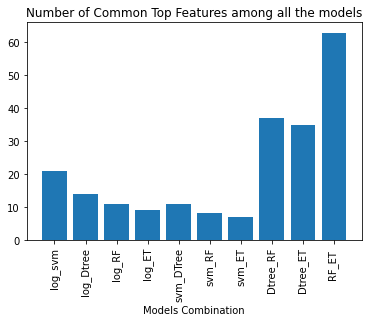

In [64]:
log_svm   = len(set(Top_features_log_reg_FFS)  & set(Top_features_lin_svm_FFS))
log_Dtree = len(set(Top_features_log_reg_FFS)  & set(Top_100_features_D_Tree_RFE))
log_RF    = len(set(Top_features_log_reg_FFS)  & set(Top_100_features_RF_RFE))
log_ET    = len(set(Top_features_log_reg_FFS)  & set(Top_100_features_E_Tree_RFE))

svm_DTree = len(set(Top_features_lin_svm_FFS)  & set(Top_100_features_D_Tree_RFE))
svm_RF    = len(set(Top_features_lin_svm_FFS)  & set(Top_100_features_RF_RFE))
svm_ET    = len(set(Top_features_lin_svm_FFS) & set(Top_100_features_E_Tree_RFE))

Dtree_RF  = len(set(Top_100_features_D_Tree_RFE)   & set(Top_100_features_RF_RFE))
Dtree_ET  = len(set(Top_100_features_D_Tree_RFE)   & set(Top_100_features_E_Tree_RFE))
RF_ET     = len(set(Top_100_features_RF_RFE)       & set(Top_100_features_E_Tree_RFE ))

X = {'log_svm':log_svm,'log_Dtree':log_Dtree,'log_RF':log_RF,'log_ET':log_ET,'svm_DTree':svm_DTree,\
     'svm_RF':svm_RF,'svm_ET':svm_ET,'Dtree_RF':Dtree_RF,'Dtree_ET':Dtree_ET,'RF_ET ':RF_ET }

x= list(X.keys())
y = list(X.values())

barPlot=plt.bar(x,y)
plt.title('Number of Common Top Features among all the models')
plt.xlabel('Models Combination')
plt.xticks(rotation='vertical')
plt.show()

<font size=3><b>From the above plot,Its evident that linear models and tree models are having very few important features in common
where as both ensemble models has good number of important features in common.
    
So From this we can conclude that we can try modelling with different set of input features for different models.

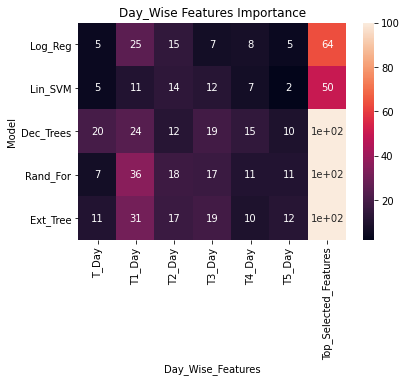

In [65]:
def count_day_features(id):
  day_features = [0]*7
  model_n_their_top_features=[]
  num_features = 100
  if id == 0:
    model_n_their_top_features = Top_features_log_reg_FFS
    num_features = 64
  elif id ==1:
    model_n_their_top_features = Top_features_lin_svm_FFS
    num_features = 50
  elif id ==2:
    model_n_their_top_features = Top_100_features_D_Tree_RFE
    num_features = 100
  elif id ==3:
    model_n_their_top_features = Top_100_features_E_Tree_RFE
    num_features = 100
  elif id ==4:
    model_n_their_top_features = Top_100_features_RF_RFE
    num_features = 100
  
  day_features[0]=len([1 for f in model_n_their_top_features if f<=19])
  day_features[1]=len([1 for f in model_n_their_top_features if f>=20 and f<=133]) 
  day_features[2]=len([1 for f in model_n_their_top_features if f>=134 and f<=241]) 
  day_features[3]=len([1 for f in model_n_their_top_features if f>=242 and f<=329]) 
  day_features[4]=len([1 for f in model_n_their_top_features if f>=330 and f<=417])
  day_features[5]=len([1 for f in model_n_their_top_features if f>=418 and f<=506]) 
  day_features[6]=num_features

  return day_features

Day_wise_features_percentage_heat_map_matrix = np.zeros(35)
Day_wise_features_percentage_heat_map_matrix  = Day_wise_features_percentage_heat_map_matrix.reshape(5,7)

rows =['Log_Reg','Lin_SVM','Dec_Trees','Rand_For','Ext_Tree']
cols =['T_Day','T1_Day','T2_Day','T3_Day','T4_Day','T5_Day','Top_Selected_Features']

for row in range(5):
  Day_wise_features_percentage_heat_map_matrix[row] = count_day_features(row)

sns.heatmap(Day_wise_features_percentage_heat_map_matrix,annot=True,
            xticklabels =cols,
            yticklabels=rows)

plt.xlabel('Day_Wise_Features')
plt.ylabel('Model')
plt.xticks(rotation='vertical')
plt.title('Day_Wise Features Importance')
plt.show()

<font size=3><b>From the above plot,Its evident that T_day and T1_day features are very important.

Importance of Remaining Features are also not negligible

In [66]:
print("\nCommon Best Features from all the feature selection techniques applied")
print("*"*70)
common_best_features = ( set(Top_features_log_reg_FFS) & set(Top_features_lin_svm_FFS) & set(Top_100_features_D_Tree_RFE) \
                         & set(Top_100_features_E_Tree_RFE) & set(Top_100_features_RF_RFE) \
                       )
print(common_best_features)
print()
for feature in list(common_best_features):
  print(Features_[feature])


Common Best Features from all the feature selection techniques applied
**********************************************************************
{48, 1, 3}

RSI-14_T1
Pivot_T
RSI-14_T


In [70]:
Top_features_log_reg_FFS.sort()
features_log_reg_df = pd.DataFrame()
features_log_reg_df['Indexer'] = list(range(1,66))
features_log_reg_df['Feature'] =X_Train_scaled.columns[Top_features_log_reg_FFS]
features_log_reg_df.to_csv('/content/drive/MyDrive/log_reg_Features.csv')

Top_features_lin_svm_FFS.sort()
features_lin_svm_df = pd.DataFrame()
features_lin_svm_df['Indexer'] = list(range(1,52))
features_lin_svm_df['Feature'] =X_Train_scaled.columns[Top_features_lin_svm_FFS]
features_lin_svm_df.to_csv('/content/drive/MyDrive/lin_svm_features.csv')

Top_100_features_D_Tree_RFE.sort()
features_dec_tree_df = pd.DataFrame()
features_dec_tree_df['Indexer'] = list(range(1,101))
features_dec_tree_df['Feature'] =X_Train_scaled.columns[Top_100_features_D_Tree_RFE]
features_dec_tree_df.to_csv('/content/drive/MyDrive/dec_tree_features.csv')

Top_100_features_RF_RFE.sort()
features_ran_for_df = pd.DataFrame()
features_ran_for_df['Indexer'] = list(range(1,101))
features_ran_for_df['Feature'] =X_Train_scaled.columns[Top_100_features_RF_RFE]
features_ran_for_df.to_csv('/content/drive/MyDrive/ran_forest_features.csv')

In [81]:
features_log_reg = pd.read_csv('/content/drive/MyDrive/log_reg_Features.csv')
train_data_log_reg = X_Train_scaled[ X_Train_scaled.columns[[Features_.index(f) for f in list(features_log_reg['Feature'])]] ]
test_data_log_reg =  X_Test_scaled[ X_Test_scaled.columns[[Features_.index(f) for f in list(features_log_reg['Feature'])]] ]
train_data_log_reg.to_csv('/content/drive/MyDrive/train_data_log_reg.csv')
test_data_log_reg.to_csv('/content/drive/MyDrive/test_data_log_reg.csv')

features_lin_svm    = pd.read_csv('/content/drive/MyDrive/lin_svm_features.csv')
train_data_lin_svm  = X_Train_scaled[ X_Train_scaled.columns[[Features_.index(f) for f in list(features_lin_svm['Feature'])]] ]
test_data_lin_svm   =  X_Test_scaled[ X_Test_scaled.columns[[Features_.index(f) for f in list(features_lin_svm['Feature'])]] ]
train_data_lin_svm.to_csv('/content/drive/MyDrive/train_data_lin_svm.csv')
test_data_lin_svm.to_csv('/content/drive/MyDrive/test_data_lin_svm.csv')

features_dec_tree    = pd.read_csv('/content/drive/MyDrive/dec_tree_features.csv')
train_data_dec_tree  = X_Train_scaled[ X_Train_scaled.columns[[Features_.index(f) for f in list(features_dec_tree['Feature'])]] ]
test_data_dec_tree   =  X_Test_scaled[ X_Test_scaled.columns[[Features_.index(f) for f in list(features_dec_tree['Feature'])]] ]
train_data_dec_tree.to_csv('/content/drive/MyDrive/train_data_dec_tree.csv')
test_data_dec_tree.to_csv('/content/drive/MyDrive/test_data_dec_tree.csv')

features_ran_for   = pd.read_csv('/content/drive/MyDrive/ran_forest_features.csv')
train_data_ran_for = X_Train_scaled[ X_Train_scaled.columns[[Features_.index(f) for f in list(features_ran_for['Feature'])]] ]
test_data_ran_for  =  X_Test_scaled[ X_Test_scaled.columns[[Features_.index(f) for f in list(features_ran_for['Feature'])]] ]
train_data_ran_for.to_csv('/content/drive/MyDrive/train_data_ran_for.csv')
test_data_ran_for.to_csv('/content/drive/MyDrive/test_data_ran_for.csv')


In [2]:
# t_day_features = 0
# t1_day_features = 0
# t2_day_features = 0
# t3_day_features = 0
# t4_day_features = 0
# t5_day_features = 0

# day_wise_features_count = [20,114,108,88,88,88]

# for f in union_features:
#   if f<=19:
#     t_day_features +=1
#   elif (f>=20 and f<=133):
#     t1_day_features +=1
#   elif (f>=134 and f<=241):
#     t2_day_features +=1
#   elif (f>=242 and f<=329):
#     t3_day_features +=1
#   elif (f>=330 and f<=417):
#     t4_day_features +=1
#   elif (f>=418):
#     t5_day_features +=1



# X = {'T_day_features':t_day_features,'T1_day_features':t1_day_features,'T2_day_features':t2_day_features,
#     'T3_day_features':t3_day_features,'T4_day_features':t4_day_features,'T5_day_features':t5_day_features}

# x= list(X.keys())
# y = list(X.values())

# barPlot=plt.bar(x,y)
# plt.title('Day wise Features among the final selected 132 features')
# plt.xlabel('Day Wise features')
# plt.xticks(rotation='vertical')


# for i in range(6):
#     plt.annotate(str(day_wise_features_count[i]), xy=(x[i],y[i]), ha='center', va='bottom')
# plt.show()

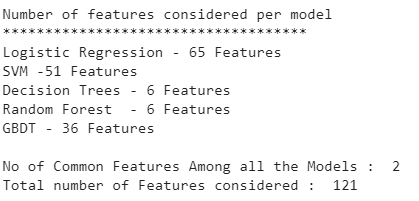

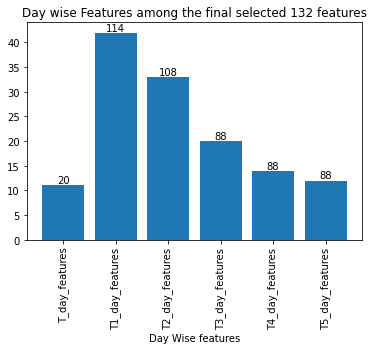

In [ ]:
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df = rankings_df[rankings_df.columns[14:]]
rankings_df['Average_Feature_Importance'] = ((rankings_df[rankings_df.columns[1:9]].sum(axis=1))/8)
rankings_df = rankings_df.sort_values(by='Average_Feature_Importance')

print("\nThe following are the Top important features,\nthat are selected by considering all Feature selection Techniques")
print("*"*60)
print()
top_20_features = list((rankings_df['Features'].iloc[0:30]))
for f in top_20_features:
    print(f)

## <font size=5 color='red'>EDA</font> 
<font size=3 ><b> EDA is performed only on top features </font>

In [ ]:
rankings_df = pd.read_csv('/content/drive/MyDrive/Feature_Rankings.csv')
rankings_df = rankings_df[rankings_df.columns[14:]]
rankings_df['Average_Feature_Importance'] = ((rankings_df[rankings_df.columns[1:9]].sum(axis=1))/8)
rankings_df = rankings_df.sort_values(by='Average_Feature_Importance')

print("\nThe following are the Top important features,\nthat are selected by considering all Feature selection Techniques")
print("*"*60)
print()
top_20_features = list((rankings_df['Features'].iloc[0:30]))
for f in top_20_features:
    print(f)


The following are the Top important features,
that are selected by considering all Feature selection Techniques
************************************************************

RSI-14_T
US_day_trend_T1
RSI-14_T1
MFI-14_T
gap_up_down_opening_T
Day_trend_T1
China_gap_up_down_opening_T
Japan_gap_up_down_opening_T
Fran_day_trend_T1
RSI-14_T4
change_in_crude_price_T1
trend_8_T1
trend_55_T1
trend_3_T4
hongkong_today_init_trend_T
US_gap_up_down_opening_T1
MACD_T1
trend_5_T4
FII_Options_Net_T4
RSI-14_T2
Lon_day_trend_T1
ADOSC_T1
china_today_init_trend_strength_low_shadow_T
US_day_trend_T2
Volume_T2
FII_Futures_Net_T4
Japan_day_trend_T1
trend_5_T1
RSI-14_T3
OBV_T1


In [26]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### <font size=4 color='red'>Univariate Analysis</font> 

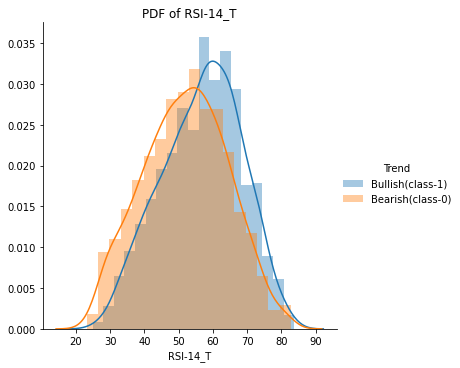

In [ ]:
X_Train['Trend'] = Y_Train.apply(lambda d: 'Bearish(class-0)' if d==0 else 'Bullish(class-1)')

sns.FacetGrid(X_Train, hue="Trend", height=5) \
   .map(sns.distplot, "RSI-14_T") \
   .add_legend();
plt.title("PDF of RSI-14_T")
plt.show();

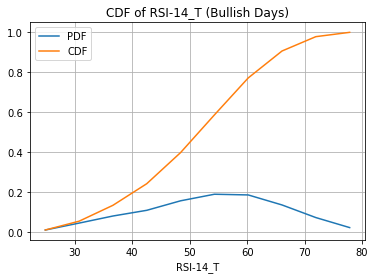

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bullish(class-1)']['RSI-14_T']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('RSI-14_T')
plt.grid()
plt.title("CDF of RSI-14_T (Bullish Days)")
plt.show();

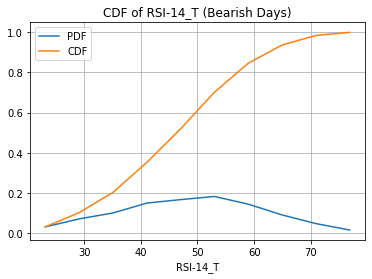

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bearish(class-0)']['RSI-14_T']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('RSI-14_T')
plt.grid()
plt.title("CDF of RSI-14_T (Bearish Days)")
plt.show();

<font size=3><b> From all the above plots , we can see that whenever RSI-14_T value is greater than 60,
<br>The probability of the day being bullish is high.

<b> And Whenever RSI-14_T value is less than 50,
The probability of the day being bearish is high.

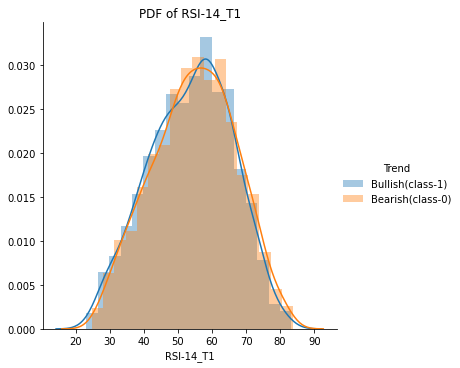

In [ ]:
sns.FacetGrid(X_Train, hue="Trend", height=5) \
   .map(sns.distplot, "RSI-14_T1") \
   .add_legend();
plt.title("PDF of RSI-14_T1")
plt.show();

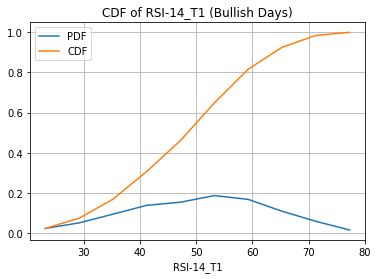

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bullish(class-1)']['RSI-14_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('RSI-14_T1')
plt.grid()
plt.title("CDF of RSI-14_T1 (Bullish Days)")
plt.show();

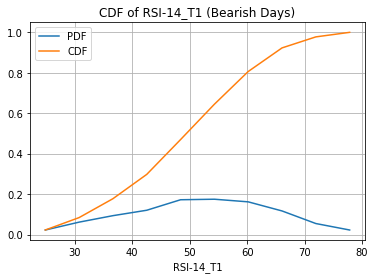

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bearish(class-0)']['RSI-14_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('RSI-14_T1')
plt.grid()
plt.title("CDF of RSI-14_T1 (Bearish Days)")
plt.show();

<font size=3><b> From all the above plots , we can observe that Whenever RSI-14_T1 value is greater than 70,
<br>The probability of the day being bearish is high.

<b> And Whenever RSI-14_T1 value is less than 30,
The probability of the day being bullish is slightly high.

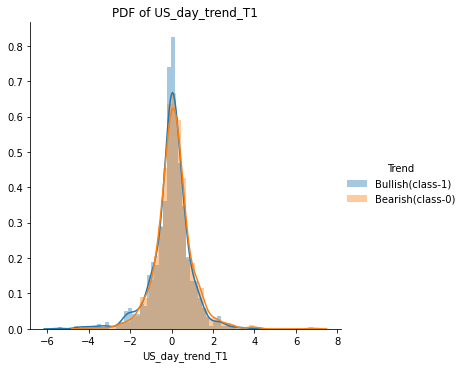

In [ ]:
sns.FacetGrid(X_Train, hue="Trend", height=5) \
   .map(sns.distplot, "US_day_trend_T1") \
   .add_legend();
plt.title("PDF of US_day_trend_T1")
plt.show();

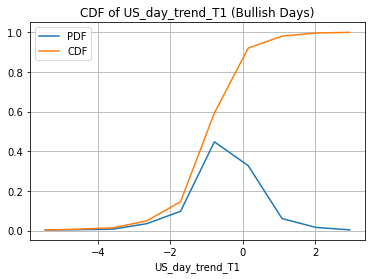

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bullish(class-1)']['US_day_trend_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('US_day_trend_T1')
plt.grid()
plt.title("CDF of US_day_trend_T1 (Bullish Days)")
plt.show();

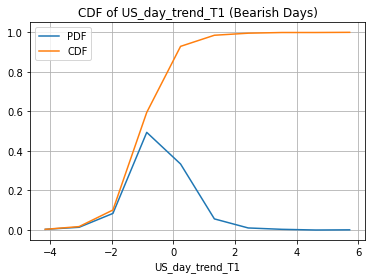

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bearish(class-0)']['US_day_trend_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('US_day_trend_T1')
plt.grid()
plt.title("CDF of US_day_trend_T1 (Bearish Days)")
plt.show();

<font size=3><b>From the above plots , we can observe that almost in 80% cases whenever the previous day trend of US is negative
<br>The current day's trend of NIFTY is also negative(bearish).
<br> Visually we cant confirm the opposite case (i.e US markets are positive and NIFTY is also positive)

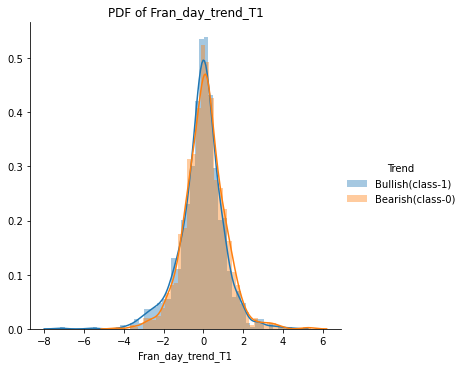

In [ ]:
sns.FacetGrid(X_Train, hue="Trend", height=5) \
   .map(sns.distplot, "Fran_day_trend_T1") \
   .add_legend();
plt.title("PDF of Fran_day_trend_T1")
plt.show();

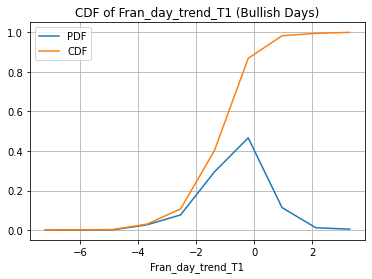

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bullish(class-1)']['Fran_day_trend_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('Fran_day_trend_T1')
plt.grid()
plt.title("CDF of Fran_day_trend_T1 (Bullish Days)")
plt.show();

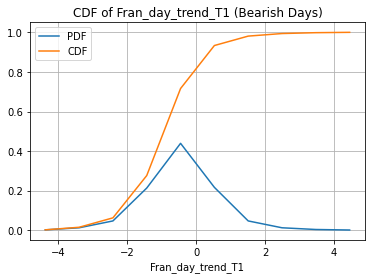

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bearish(class-0)']['Fran_day_trend_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('Fran_day_trend_T1')
plt.grid()
plt.title("CDF of Fran_day_trend_T1 (Bearish Days)")
plt.show();

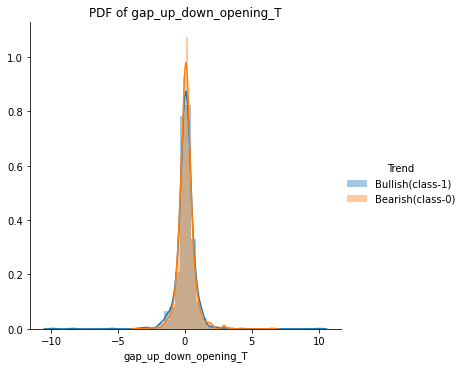

In [ ]:
sns.FacetGrid(X_Train, hue="Trend", height=5) \
   .map(sns.distplot, "gap_up_down_opening_T") \
   .add_legend();
plt.title("PDF of gap_up_down_opening_T")
plt.show();

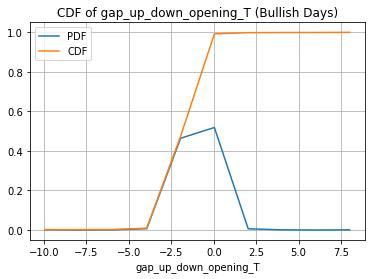

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bullish(class-1)']['gap_up_down_opening_T']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('gap_up_down_opening_T')
plt.grid()
plt.title("CDF of gap_up_down_opening_T (Bullish Days)")
plt.show();

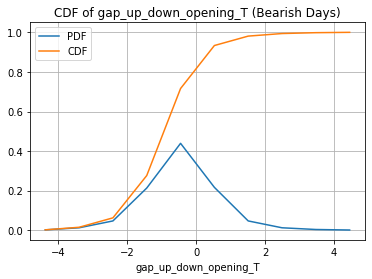

In [ ]:
data = X_Train[X_Train['Trend'] == 'Bearish(class-0)']['Fran_day_trend_T1']
counts, bin_edges = np.histogram(data, bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[0:len(bin_edges)-1],pdf,label="PDF")
plt.plot(bin_edges[0:len(bin_edges)-1], cdf,label="CDF")
plt.legend()
plt.xlabel('gap_up_down_opening_T')
plt.grid()
plt.title("CDF of gap_up_down_opening_T (Bearish Days)")
plt.show();

<b><font size=3>From the above plots its evident that whenerver gap_up_down_opening is negative,
NIFTY is also Bearish 80% of the time.

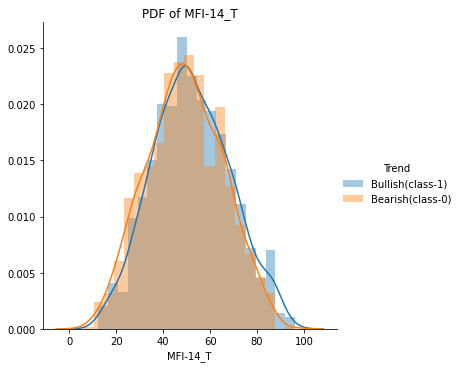

In [ ]:
sns.FacetGrid(X_Train, hue="Trend", height=5) \
   .map(sns.distplot, "MFI-14_T") \
   .add_legend();
plt.title("PDF of MFI-14_T")
plt.show();

<font size=3><b> From the above plot, we can observe that Whenever MFI_14_T value is greater than 70,
<br>The probability of the day being bullish is slightly high.

<b> And Whenever MFI_14_T value is less than 30,
The probability of the day being bearish is slightly high.

#### <font size=4 color='red'>Bivariate Analysis</font> 

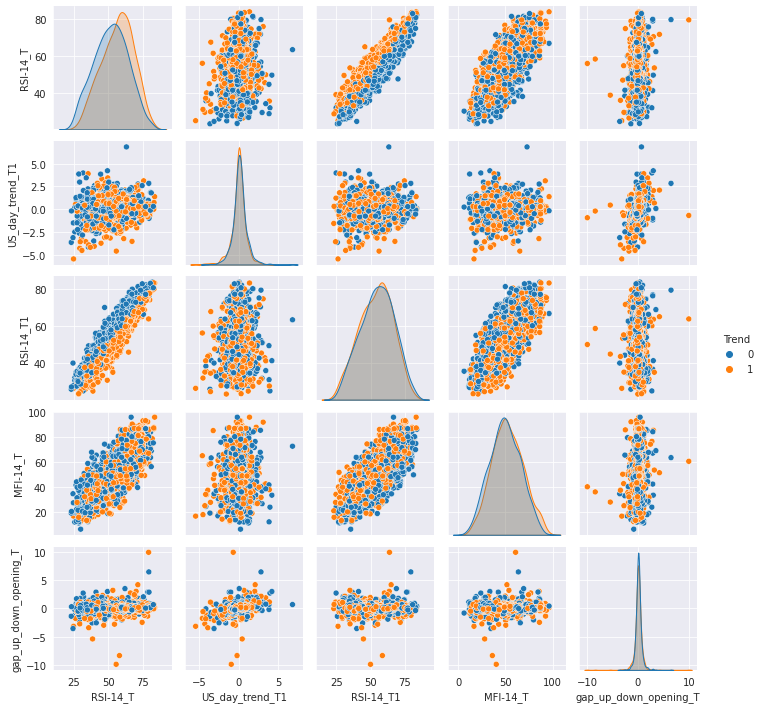

In [ ]:
data = X_Train[['RSI-14_T','US_day_trend_T1','RSI-14_T1','MFI-14_T','gap_up_down_opening_T','Trend']]
sns.set_style("darkgrid");
sns.pairplot(data,hue="Trend",height=2)
plt.show()

<font size=3><b>From the above pair plots ,visually we can observe that a linear model might fit the data with good accuracy <br>
    by using both RSI_14_T and RSI_14_T1 features.
<br> Remaining plots are not easily interpretable because data is highly overlapping
<br> In some pair plots we can observe that some of the points are clearly seperated from the whole data set.